# Here we predict Portuguese Parliamentary Elections

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [69]:
ds=pd.read_csv("Election.csv")
ds

TimeElapsed                 time        territoryName  totalMandates  \
0                0  2019-10-06 20:10:02  Território Nacional              0   
1                0  2019-10-06 20:10:02  Território Nacional              0   
2                0  2019-10-06 20:10:02  Território Nacional              0   
3                0  2019-10-06 20:10:02  Território Nacional              0   
4                0  2019-10-06 20:10:02  Território Nacional              0   
...            ...                  ...                  ...            ...   
21638          265  2019-10-07 00:35:01                Viseu              8   
21639          265  2019-10-07 00:35:01                Viseu              8   
21640          265  2019-10-07 00:35:01                Viseu              8   
21641          265  2019-10-07 00:35:01                Viseu              8   
21642          265  2019-10-07 00:35:01                Viseu              8   

       availableMandates  numParishes  numParishesApproved  blankVotes  \
0                    226         3092                 1081        9652   
1                    226         3092                 1081        9652   
2                    226         3092                 1081        9652   
3                    226         3092                 1081        9652   
4                    226         3092                 1081        9652   
...                  ...          ...                  ...         ...   
21638                  0          277                  277        4995   
21639                  0          277                  277        4995   
21640                  0          277                  277        4995   
21641                  0          277                  277        4995   
21642                  0          277                  277        4995   

       blankVotesPercentage  nullVotes  ...  pre.votersPercentage  \
0                      2.50       8874  ...                 52.66   
1                      2.50       8874  ...                 52.66   
2                      2.50       8874  ...                 52.66   
3                      2.50       8874  ...                 52.66   
4                      2.50       8874  ...                 52.66   
...                     ...        ...  ...                   ...   
21638                  2.81       3700  ...                 51.28   
21639                  2.81       3700  ...                 51.28   
21640                  2.81       3700  ...                 51.28   
21641                  2.81       3700  ...                 51.28   
21642                  2.81       3700  ...                 51.28   

       pre.subscribedVoters  pre.totalVoters    Party  Mandates  Percentage  \
0                    813743           428546       PS         0       38.29   
1                    813743           428546  PPD/PSD         0       33.28   
2                    813743           428546     B.E.         0        6.81   
3                    813743           428546   CDS-PP         0        4.90   
4                    813743           428546  PCP-PEV         0        4.59   
...                     ...              ...      ...       ...         ...   
21638                371931           190712       NC         0        0.19   
21639                371931           190712      PNR         0        0.18   
21640                371931           190712      MPT         0        0.14   
21641                371931           190712      PTP         0        0.13   
21642                371931           190712      JPP         0        0.07   

       validVotesPercentage   Votes  Hondt  FinalMandates  
0                     40.22  147993     94            106  
1                     34.95  128624     81             77  
2                      7.15   26307     16             19  
3                      5.14   18923     12              5  
4                      4.83   17757     11             12  
...                     ...    

In [70]:
ds.shape

(21643, 28)

Observation:
    
    There are 21643 rows and 28 columns present in our dataset.

In [71]:
ds.columns

Index(['TimeElapsed', 'time', 'territoryName', 'totalMandates',
       'availableMandates', 'numParishes', 'numParishesApproved', 'blankVotes',
       'blankVotesPercentage', 'nullVotes', 'nullVotesPercentage',
       'votersPercentage', 'subscribedVoters', 'totalVoters', 'pre.blankVotes',
       'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage',
       'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters',
       'Party', 'Mandates', 'Percentage', 'validVotesPercentage', 'Votes',
       'Hondt', 'FinalMandates'],
      dtype='object')

Features:
    
    TimeElapsed (Numeric): Time (minutes) passed since the first data acquisition
    time (timestamp): Date and time of the data acquisition
    territoryName (string): Short name of the location (district or nation-wide)
    totalMandates (numeric): MP's elected at the moment
    availableMandates (numeric): MP's left to elect at the moment
    numParishes (numeric): Total number of parishes in this location
    numParishesApproved (numeric): Number of parishes approved in this location
    blankVotes (numeric): Number of blank votes
    blankVotesPercentage (numeric): Percentage of blank votes
    nullVotes (numeric): Number of null votes
    nullVotesPercentage (numeric): Percentage of null votes
    votersPercentage (numeric): Percentage of voters
    subscribedVoters (numeric): Number of subscribed voters in the location
    totalVoters (numeric): Percentage of blank votes
    pre.blankVotes (numeric): Number of blank votes (previous election)
    pre.blankVotesPercentage (numeric): Percentage of blank votes (previous election)
    pre.nullVotes (numeric): Number of null votes (previous election)
    pre.nullVotesPercentage (numeric): Percentage of null votes (previous election)
    pre.votersPercentage (numeric): Percentage of voters (previous election)
    pre.subscribedVoters (numeric): Number of subscribed voters in the location (previous election)
    pre.totalVoters (numeric): Percentage of blank votes (previous election)
    Party (string): Political Party
    Mandates (numeric): MP's elected at the moment for the party in a given district
    Percentage (numeric): Percentage of votes in a party
    validVotesPercentage (numeric): Percentage of valid votes in a party
    Votes (numeric): Percentage of party votes
    Hondt (numeric): Number of MP's according to the distribution of votes now
    FinalMandates (numeric): Target: final number of elected MP's in a district/national-level



In [72]:
ds.dtypes

TimeElapsed                   int64
time                         object
territoryName                object
totalMandates                 int64
availableMandates             int64
numParishes                   int64
numParishesApproved           int64
blankVotes                    int64
blankVotesPercentage        float64
nullVotes                     int64
nullVotesPercentage         float64
votersPercentage            float64
subscribedVoters              int64
totalVoters                   int64
pre.blankVotes                int64
pre.blankVotesPercentage    float64
pre.nullVotes                 int64
pre.nullVotesPercentage     float64
pre.votersPercentage        float64
pre.subscribedVoters          int64
pre.totalVoters               int64
Party                        object
Mandates                      int64
Percentage                  float64
validVotesPercentage        float64
Votes                         int64
Hondt                         int64
FinalMandates               

Observatino:
    
    There are categorical and numerical features present in our dataset.

## Checking missing values

In [73]:
ds.isnull().sum()

TimeElapsed                 0
time                        0
territoryName               0
totalMandates               0
availableMandates           0
numParishes                 0
numParishesApproved         0
blankVotes                  0
blankVotesPercentage        0
nullVotes                   0
nullVotesPercentage         0
votersPercentage            0
subscribedVoters            0
totalVoters                 0
pre.blankVotes              0
pre.blankVotesPercentage    0
pre.nullVotes               0
pre.nullVotesPercentage     0
pre.votersPercentage        0
pre.subscribedVoters        0
pre.totalVoters             0
Party                       0
Mandates                    0
Percentage                  0
validVotesPercentage        0
Votes                       0
Hondt                       0
FinalMandates               0
dtype: int64

Observation:
    
    There are no missing values present in our dataset.
    
We can also confirm this via visualization with the help of heatmap.

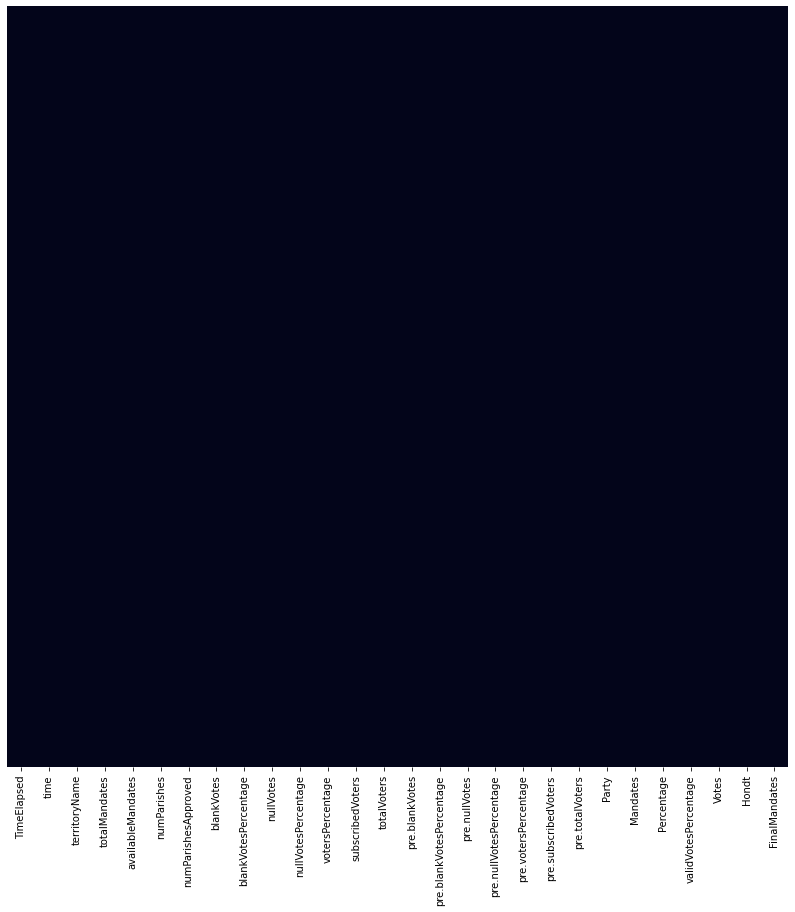

In [74]:
plt.figure(figsize=(14,14))
sns.heatmap(ds.isnull(),yticklabels=False,cbar=False)

## Exploring Categorical columns

In [75]:
for column in ds.columns:
    if ds[column].dtypes == object:
        print(str(column) + ' : ' + str(ds[column].unique()))
        print(ds[column].value_counts())
        print('*******************************************************************************************************')
        print('\n')

time : ['2019-10-06 20:10:02' '2019-10-06 20:15:02' '2019-10-06 20:20:02'
 '2019-10-06 20:25:02' '2019-10-06 20:30:02' '2019-10-06 20:35:02'
 '2019-10-06 20:40:02' '2019-10-06 20:45:02' '2019-10-06 20:50:01'
 '2019-10-06 20:55:01' '2019-10-06 21:00:01' '2019-10-06 21:05:01'
 '2019-10-06 21:10:01' '2019-10-06 21:15:02' '2019-10-06 21:20:02'
 '2019-10-06 21:25:02' '2019-10-06 21:30:01' '2019-10-06 21:35:01'
 '2019-10-06 21:40:02' '2019-10-06 21:45:02' '2019-10-06 21:50:01'
 '2019-10-06 21:55:01' '2019-10-06 22:00:02' '2019-10-06 22:05:02'
 '2019-10-06 22:10:01' '2019-10-06 22:15:01' '2019-10-06 22:20:02'
 '2019-10-06 22:25:01' '2019-10-06 22:30:01' '2019-10-06 22:35:01'
 '2019-10-06 22:40:02' '2019-10-06 22:45:01' '2019-10-06 22:50:01'
 '2019-10-06 22:55:02' '2019-10-06 23:00:01' '2019-10-06 23:05:01'
 '2019-10-06 23:10:02' '2019-10-06 23:15:01' '2019-10-06 23:20:01'
 '2019-10-06 23:25:02' '2019-10-06 23:30:01' '2019-10-06 23:35:02'
 '2019-10-06 23:40:01' '2019-10-06 23:45:02' '2019-10-0

## Feature extraction

In [76]:
ds['time'] = pd.to_datetime(ds['time'])
ds['time']

0       2019-10-06 20:10:02
1       2019-10-06 20:10:02
2       2019-10-06 20:10:02
3       2019-10-06 20:10:02
4       2019-10-06 20:10:02
                ...        
21638   2019-10-07 00:35:01
21639   2019-10-07 00:35:01
21640   2019-10-07 00:35:01
21641   2019-10-07 00:35:01
21642   2019-10-07 00:35:01
Name: time, Length: 21643, dtype: datetime64[ns]

In [77]:
ds['time'].dt.day

0        6
1        6
2        6
3        6
4        6
        ..
21638    7
21639    7
21640    7
21641    7
21642    7
Name: time, Length: 21643, dtype: int64

In [78]:
ds['day'] = ds['time'].dt.day

In [79]:
ds.head()

TimeElapsed                time        territoryName  totalMandates  \
0            0 2019-10-06 20:10:02  Território Nacional              0   
1            0 2019-10-06 20:10:02  Território Nacional              0   
2            0 2019-10-06 20:10:02  Território Nacional              0   
3            0 2019-10-06 20:10:02  Território Nacional              0   
4            0 2019-10-06 20:10:02  Território Nacional              0   

   availableMandates  numParishes  numParishesApproved  blankVotes  \
0                226         3092                 1081        9652   
1                226         3092                 1081        9652   
2                226         3092                 1081        9652   
3                226         3092                 1081        9652   
4                226         3092                 1081        9652   

   blankVotesPercentage  nullVotes  ...  pre.subscribedVoters  \
0                   2.5       8874  ...                813743   
1                   2.5       8874  ...                813743   
2                   2.5       8874  ...                813743   
3                   2.5       8874  ...                813743   
4                   2.5       8874  ...                813743   

   pre.totalVoters    Party  Mandates  Percentage  validVotesPercentage  \
0           428546       PS         0       38.29                 40.22   
1           428546  PPD/PSD         0       33.28                 34.95   
2           428546     B.E.         0        6.81                  7.15   
3           428546   CDS-PP         0        4.90                  5.14   
4           428546  PCP-PEV         0        4.59                  4.83   

    Votes  Hondt  FinalMandates  day  
0  147993     94            106    6  
1  128624     81             77    6  
2   26307     16             19    6  
3   18923     12              5    6  
4   17757     11             12    6  

[5 rows x 29 columns]

In [80]:
ds['time'].dt.hour

0        20
1        20
2        20
3        20
4        20
         ..
21638     0
21639     0
21640     0
21641     0
21642     0
Name: time, Length: 21643, dtype: int64

In [82]:
ds.head()

TimeElapsed                time        territoryName  totalMandates  \
0            0 2019-10-06 20:10:02  Território Nacional              0   
1            0 2019-10-06 20:10:02  Território Nacional              0   
2            0 2019-10-06 20:10:02  Território Nacional              0   
3            0 2019-10-06 20:10:02  Território Nacional              0   
4            0 2019-10-06 20:10:02  Território Nacional              0   

   availableMandates  numParishes  numParishesApproved  blankVotes  \
0                226         3092                 1081        9652   
1                226         3092                 1081        9652   
2                226         3092                 1081        9652   
3                226         3092                 1081        9652   
4                226         3092                 1081        9652   

   blankVotesPercentage  nullVotes  ...  pre.totalVoters    Party  Mandates  \
0                   2.5       8874  ...           428546       PS         0   
1                   2.5       8874  ...           428546  PPD/PSD         0   
2                   2.5       8874  ...           428546     B.E.         0   
3                   2.5       8874  ...           428546   CDS-PP         0   
4                   2.5       8874  ...           428546  PCP-PEV         0   

   Percentage  validVotesPercentage   Votes  Hondt  FinalMandates  day  hour  
0       38.29                 40.22  147993     94            106    6    20  
1       33.28                 34.95  128624     81             77    6    20  
2        6.81                  7.15   26307     16             19    6    20  
3        4.90                  5.14   18923     12              5    6    20  
4        4.59                  4.83   17757     11             12    6    20  

[5 rows x 30 columns]

Observation:
    
    We have extracted day and hours from time column, we dpnt need year and month because there is only one unique value present of those.

## Summary Stastics

In [83]:
ds.describe()

TimeElapsed  totalMandates  availableMandates   numParishes  \
count  21643.000000   21643.000000       21643.000000  21643.000000   
mean     133.146052      11.544795          11.499284    309.956013   
std       77.651193      31.314567          31.738783    659.055911   
min        0.000000       0.000000           0.000000     54.000000   
25%       65.000000       1.000000           0.000000     75.000000   
50%      135.000000       4.000000           3.000000    147.000000   
75%      200.000000       9.000000           9.000000    242.000000   
max      265.000000     226.000000         226.000000   3092.000000   

       numParishesApproved     blankVotes  blankVotesPercentage     nullVotes  \
count         21643.000000   21643.000000          21643.000000  21643.000000   
mean            261.090237    8875.066673              2.621629   6148.068752   
std             583.377428   21484.874088              0.795289  14735.469269   
min               3.000000      19.000000              0.530000     39.000000   
25%              67.000000    1188.000000              2.230000   1094.000000   
50%             120.000000    2998.000000              2.640000   2232.000000   
75%             208.000000    6889.000000              2.980000   4121.000000   
max            3092.000000  129599.000000              5.460000  88539.000000   

       nullVotesPercentage  votersPercentage  ...  pre.subscribedVoters  \
count         21643.000000      21643.000000  ...          2.164300e+04   
mean              1.961471         51.983722  ...          6.378503e+05   
std               0.375250          4.854380  ...          1.544418e+06   
min               1.340000         35.980000  ...          6.383000e+03   
25%               1.720000         50.290000  ...          1.289260e+05   
50%               1.870000         53.130000  ...          2.284970e+05   
75%               2.230000         54.550000  ...          3.933140e+05   
max               3.350000         59.870000  ...          9.439701e+06   

       pre.totalVoters      Mandates    Percentage  validVotesPercentage  \
count     2.164300e+04  21643.000000  21643.000000          21643.000000   
mean      3.594932e+05      0.565495      4.968484              5.207232   
std       8.763729e+05      4.421804     10.379967             10.881108   
min       3.215000e+03      0.000000      0.020000              0.020000   
25%       6.964400e+04      0.000000      0.220000              0.230000   
50%       1.102730e+05      0.000000      0.620000              0.650000   
75%       2.276200e+05      0.000000      3.010000              3.160000   
max       5.380451e+06    106.000000     49.110000             51.420000   

              Votes         Hondt  FinalMandates           day          hour  
count  2.164300e+04  21643.000000   21643.000000  21643.000000  21643.000000  
mean   1.585209e+04      1.126138       1.126138      6.148963     18.361410  
std    9.310605e+04      6.293552       6.872644      0.356060      7.747974  
min    1.000000e+00      0.000000       0.000000      6.000000      0.000000  
25%    2.360000e+02      0.000000       0.000000      6.000000     20.000000  
50%    7.900000e+02      0.000000       0.000000      6.000000     21.000000  
75%    4.510000e+03      0.000000       0.000000      6.000000     22.000000  
max    1.866407e+06     94.000000     106.000000      7.000000     23.000000  

[8 rows x 27 columns]

Observation:
    
    1. Maximum standard deviation is present in blankVotes column.
    
    2. In columns totalMandates, availableMandates, numParishes, numParishesApproved, blankVotes, nullVotes, Percentage, Validvoterpercentage mean is grater than medain so the columns are positively skewed.
    
    2. In columns  totalMandates, availableMandates, numParishes, numParishesApproved, blankVotes, nullVotes, Percentage, validvotepercentage there is huge between maximum and 75% so outliers are present there.
    

## To check the correlation

In [84]:
ds_cor=ds.corr()
ds_cor

TimeElapsed  totalMandates  availableMandates  \
TimeElapsed                  1.000000       0.260377          -0.261627   
totalMandates                0.260377       1.000000           0.217404   
availableMandates           -0.261627       0.217404           1.000000   
numParishes                 -0.001944       0.765877           0.745472   
numParishesApproved          0.100432       0.873415           0.562719   
blankVotes                   0.192350       0.969988           0.390638   
blankVotesPercentage         0.034343      -0.003149          -0.002806   
nullVotes                    0.185784       0.967294           0.407366   
nullVotesPercentage         -0.225021      -0.165132           0.029915   
votersPercentage             0.029698       0.171317           0.112293   
subscribedVoters             0.195487       0.974407           0.385828   
totalVoters                  0.198243       0.976336           0.379093   
pre.blankVotes               0.195734       0.973357           0.383877   
pre.blankVotesPercentage     0.093739       0.034774          -0.008966   
pre.nullVotes                0.189902       0.969992           0.399074   
pre.nullVotesPercentage     -0.106054      -0.132143          -0.044174   
pre.votersPercentage         0.054761       0.151927           0.080524   
pre.subscribedVoters         0.193160       0.972976           0.391272   
pre.totalVoters              0.196667       0.975404           0.383089   
Mandates                     0.090190       0.336989           0.072320   
Percentage                   0.000767      -0.010171          -0.011083   
validVotesPercentage         0.000526      -0.010474          -0.011052   
Votes                        0.082417       0.395617           0.152348   
Hondt                       -0.001100       0.288420           0.291310   
FinalMandates               -0.001007       0.264117           0.266764   
day                          0.616137       0.136754          -0.136227   
hour                        -0.512023      -0.107229           0.106453   

                          numParishes  numParishesApproved  blankVotes  \
TimeElapsed                 -0.001944             0.100432    0.192350   
totalMandates                0.765877             0.873415    0.969988   
availableMandates            0.745472             0.562719    0.390638   
numParishes                  1.000000             0.954092    0.861279   
numParishesApproved          0.954092             1.000000    0.951265   
blankVotes                   0.861279             0.951265    1.000000   
blankVotesPercentage         0.032013             0.035153    0.038503   
nullVotes                    0.870240             0.956142    0.998781   
nullVotesPercentage          0.013209            -0.037416   -0.150894   
votersPercentage             0.073855             0.081157    0.183970   
subscribedVoters             0.856855             0.946191    0.998297   
totalVoters                  0.850881             0.940941    0.997951   
pre.blankVotes               0.856779             0.947190    0.999657   
pre.blankVotesPercentage     0.036461             0.050378    0.072183   
pre.nullVotes                0.864837             0.951899    0.997490   
pre.nullVotesPercentage     -0.058017            -0.073301   -0.150275   
pre.votersPercentage         0.026407             0.042180    0.161642   
pre.subscribedVoters         0.860782             0.949110    0.998487   
pre.totalVoters              0.853779             0.943147    0.998178   
Mandates                     0.257365             0.293795    0.326630   
Percentage                  -0.010770            -0.009840   -0.011883   
validVotesPercentage        -0.010624            -0.009767   -0.012002   
Votes                        0.343593             0.380311    0.404003   
Hondt                        0.359283             0.340901    0.322780   
FinalMandates                0.329009             0.312177    0.295583   
d

For better understanding we will see it via visualization with the help of heatmap.

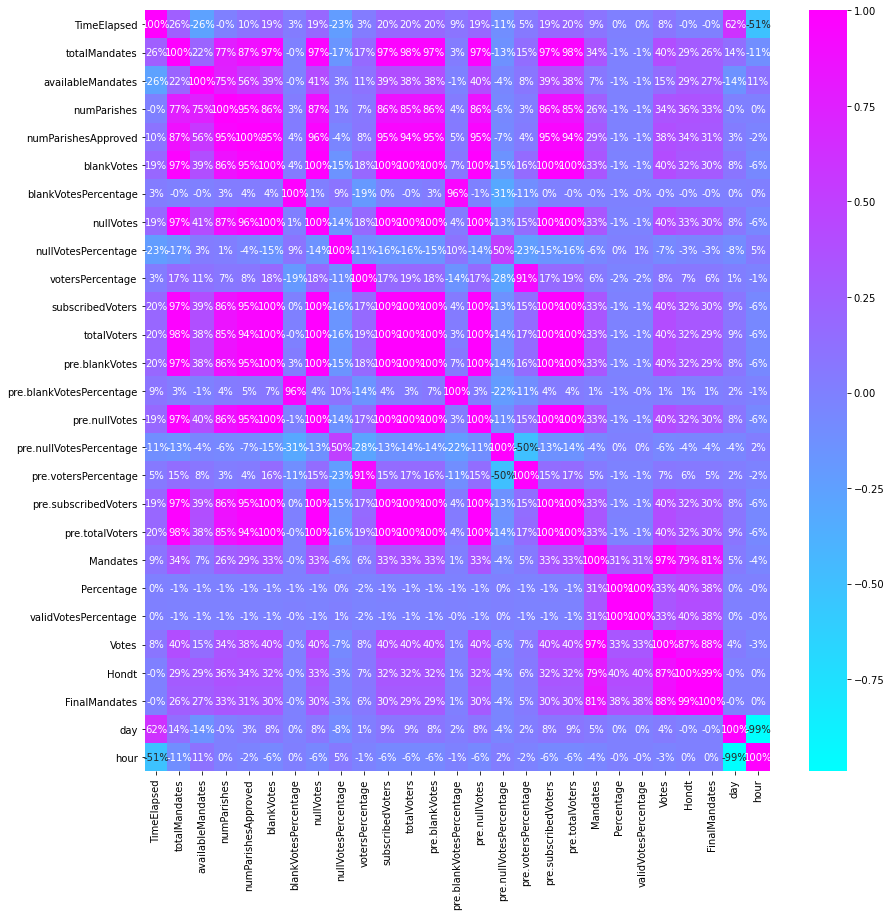

In [85]:
plt.figure(figsize=(14,14))
sns.heatmap(ds_cor,annot=True,fmt='.0%',cmap='cool')
plt.show()

Observation:
    
    1. Finalmandates is highly positively correlated with Hondt, Votes, Mandates, TimeElapsed
    
    2. We have observed multicollinearity in columns so we will be using PCA.

Text(0.5, 1.0, 'correaltion with target variable FinalMandates')

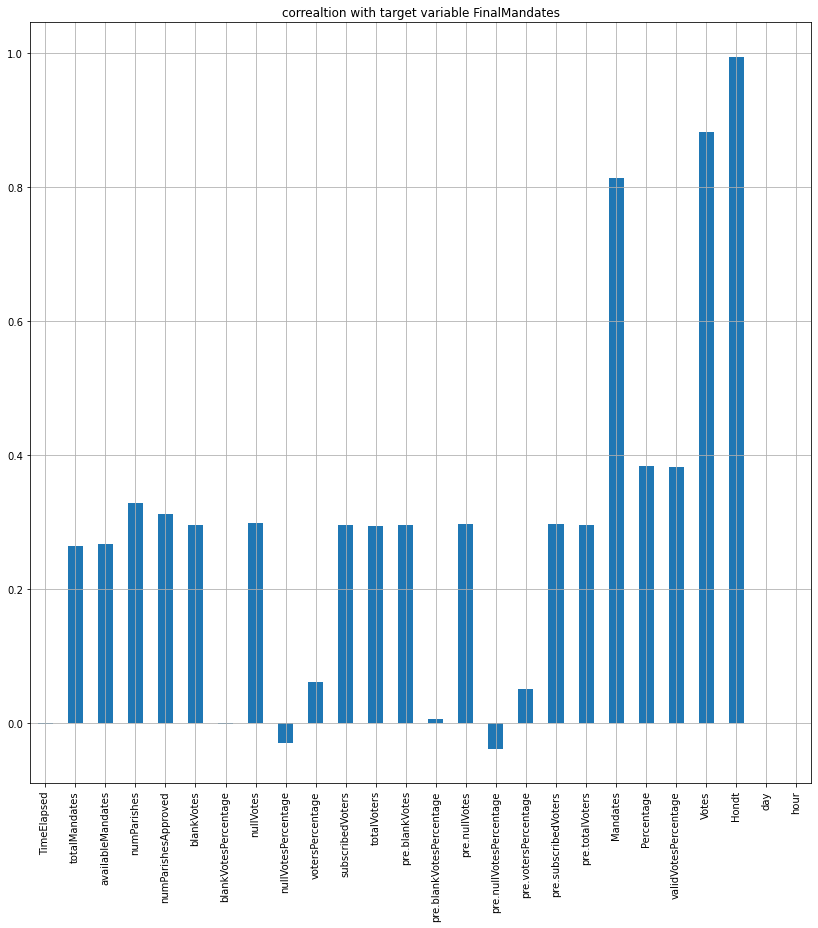

In [89]:
#checking the correlation with target variable 'FinalMandates'

plt.figure(figsize=(14,14))
ds.drop('FinalMandates', axis=1).corrwith(ds['FinalMandates']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title("correaltion with target variable FinalMandates")

Observation:
    
    1. Finalmandates is highly positively correlated with Hondt, Votes, Mandates.
    
    2. FinalMandates is negatively correlated with nullVotesPercentage

# Data visualization

Our target variable is FinalMandates column

## Univariate Analysis

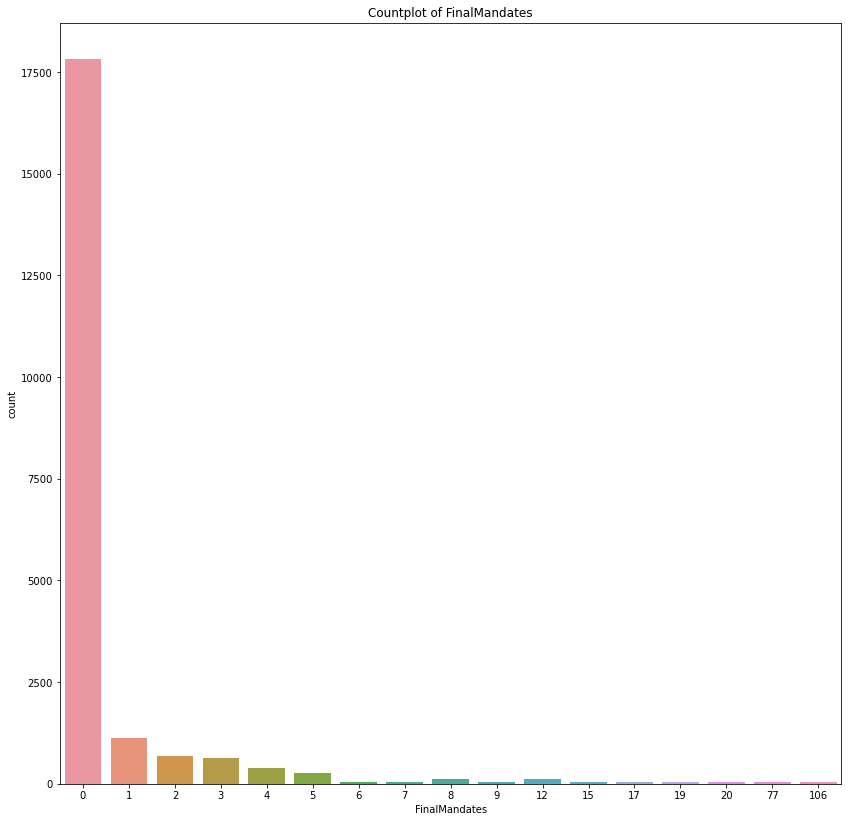

0      17823
1       1134
2        695
3        641
4        378
5        270
8        108
12       108
7         54
6         54
77        54
20        54
19        54
9         54
106       54
17        54
15        54
Name: FinalMandates, dtype: int64

In [90]:
#Checking the target variable

plt.subplots(figsize=(14,14))
sns.countplot(x="FinalMandates", data=ds)
plt.title("Countplot of FinalMandates")
plt.xlabel('FinalMandates')
plt.ylabel("count")
plt.show()

ds['FinalMandates'].value_counts()

Observation:
    
    1. Maximum number of FinalMandates observed are 106 in 54 rows.
    
    2. In Maximum(17823) rows no. of FinalMandates observed are 0.

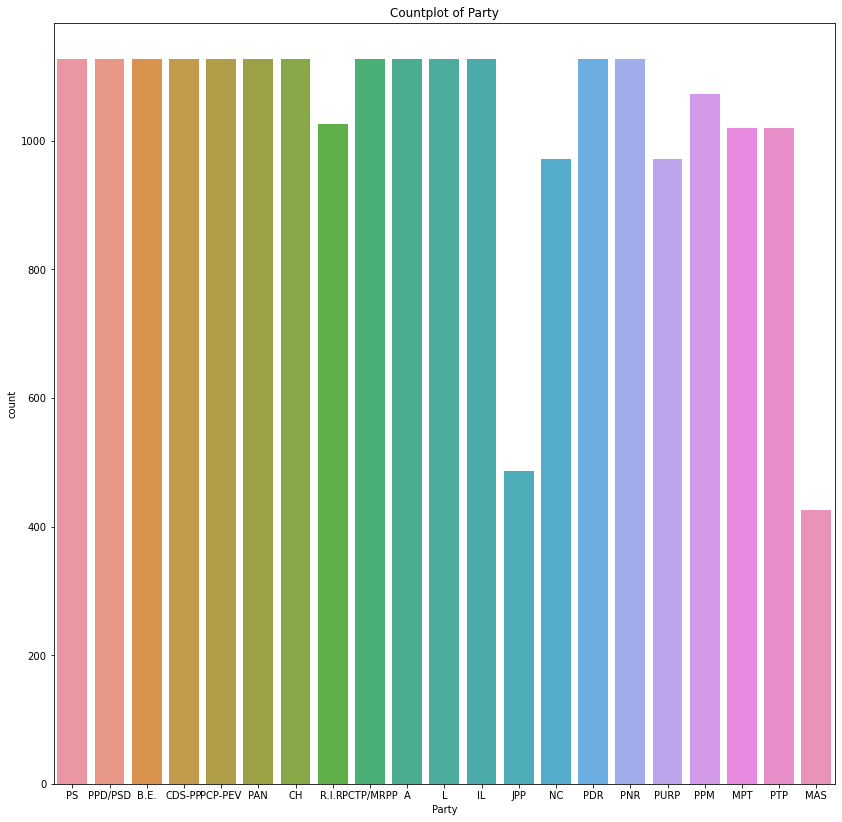

B.E.         1127
PAN          1127
CH           1127
PNR          1127
A            1127
PDR          1127
L            1127
IL           1127
PCP-PEV      1127
CDS-PP       1127
PCTP/MRPP    1127
PS           1127
PPD/PSD      1127
PPM          1073
R.I.R.       1026
MPT          1019
PTP          1019
NC            972
PURP          972
JPP           486
MAS           425
Name: Party, dtype: int64

In [91]:
#Checking the column Party

plt.subplots(figsize=(14,14))
sns.countplot(x="Party", data=ds)
plt.title("Countplot of Party")
plt.xlabel('Party')
plt.ylabel("count")
plt.show()

ds['Party'].value_counts()

Observation:
    
    MAS party is observed in minimum(425) number of rows.

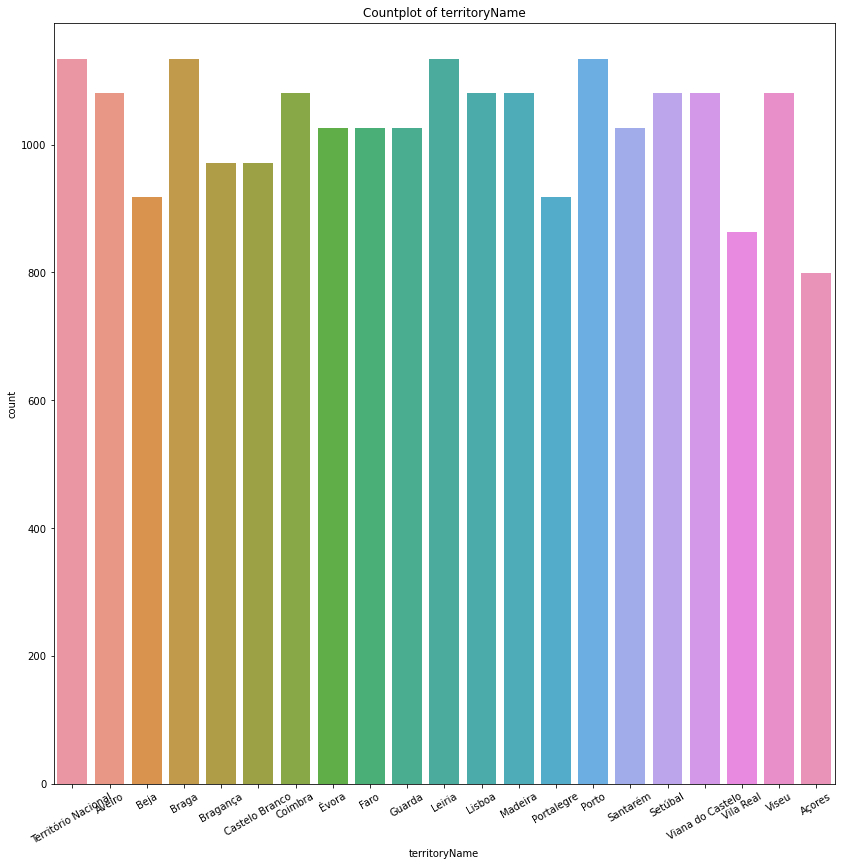

Porto                  1134
Território Nacional    1134
Leiria                 1134
Braga                  1134
Coimbra                1080
Lisboa                 1080
Aveiro                 1080
Madeira                1080
Setúbal                1080
Viseu                  1080
Viana do Castelo       1080
Guarda                 1026
Santarém               1026
Faro                   1026
Évora                  1026
Castelo Branco          972
Bragança                972
Portalegre              918
Beja                    918
Vila Real               864
Açores                  799
Name: territoryName, dtype: int64

In [93]:
#Checking the colum territoryName

plt.subplots(figsize=(14,14))
sns.countplot(x="territoryName", data=ds)
plt.title("Countplot of territoryName")
plt.xticks(rotation= 30)
plt.xlabel('territoryName')
plt.ylabel("count")
plt.show()

ds['territoryName'].value_counts()

Observation:
    
    Acores territory is observed in minimum number of rows.

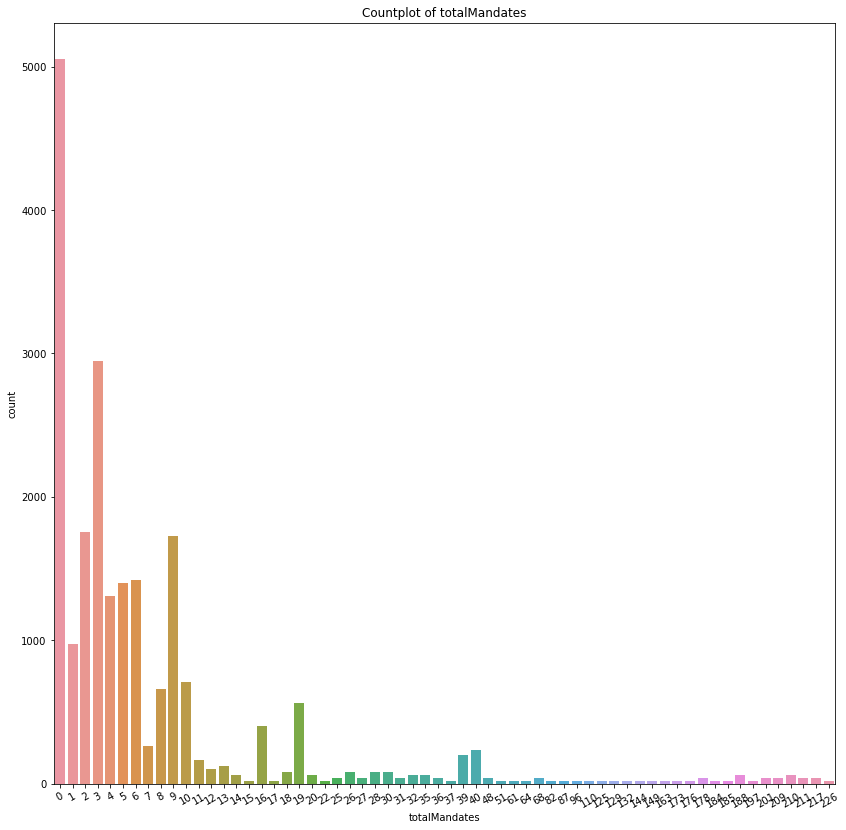

0      5055
3      2949
2      1755
9      1726
6      1419
       ... 
22       21
197      21
149      21
37       21
17       20
Name: totalMandates, Length: 62, dtype: int64

In [95]:
#Checking the column totalMandates

plt.subplots(figsize=(14,14))
sns.countplot(x="totalMandates", data=ds)
plt.title("Countplot of totalMandates")
plt.xticks(rotation= 30)
plt.xlabel('totalMandates')
plt.ylabel("count")
plt.show()

ds['totalMandates'].value_counts()

Observation:
    
    1. Maximum number of TotalMandates observed are 226.
    
    2. 0 totalMandates are observed in maximum(5055) number of rows.

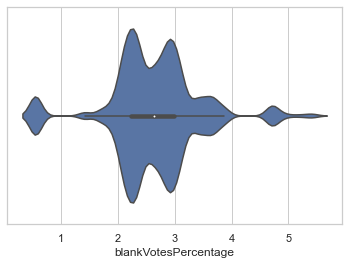

2.13    875
2.27    859
2.97    798
0.54    740
2.64    686
       ... 
5.46     17
5.15     17
5.01     17
4.87     17
1.98     16
Name: blankVotesPercentage, Length: 146, dtype: int64

In [97]:
#Checking the column blankVotesPercentage


sns.set(style='whitegrid')
sns.violinplot(ds['blankVotesPercentage'])
plt.show()

ds['blankVotesPercentage'].value_counts()

Observation:
    
    Maximum number of blankVotesPercentage falls in the range of 2.2 to 3.

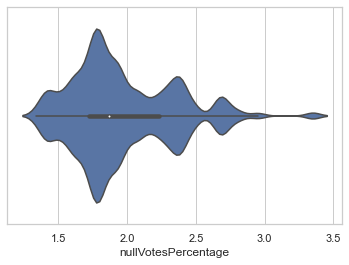

1.77    1117
1.63     824
1.93     791
1.78     728
2.30     701
        ... 
2.51      18
2.67      18
1.35      17
2.46      16
2.70      16
Name: nullVotesPercentage, Length: 107, dtype: int64

In [98]:
#Checking the column nullVotesPercentage


sns.set(style='whitegrid')
sns.violinplot(ds['nullVotesPercentage'])
plt.show()

ds['nullVotesPercentage'].value_counts()

Observation:
    
    Maximum number of nullVotesPercentage falls in the range of 1.75 to 2.25.

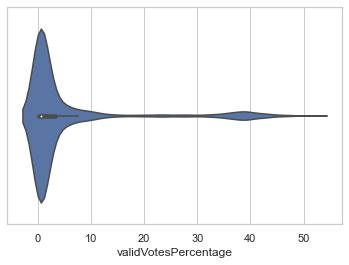

0.21     563
0.19     556
0.18     499
0.12     441
0.22     423
        ... 
23.61      1
36.70      1
7.12       1
5.44       1
32.23      1
Name: validVotesPercentage, Length: 1387, dtype: int64

In [101]:
#Checking the column validVotesPercentage


sns.set(style='whitegrid')
sns.violinplot(ds['validVotesPercentage'])
plt.show()

ds['validVotesPercentage'].value_counts()

Observation:
    
    Maximum number of validVotesPercentage has been observed in the range of 0.21 to 0.5

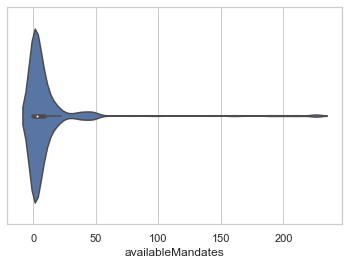

0      9686
3      1873
6      1201
9      1150
4      1089
       ... 
101      21
37       21
212      21
175      21
44       20
Name: availableMandates, Length: 69, dtype: int64

In [104]:
#Checking the column availableMandates


sns.set(style='whitegrid')
sns.violinplot(ds['availableMandates'])
plt.show()

ds['availableMandates'].value_counts()

Observation:
    
    Maximum number of availableMandates falls in the range of 0 to 10.

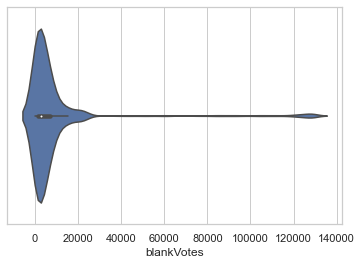

1371    716
2026    665
3617    640
697     620
1680    608
       ... 
1870     16
1561     16
1722     16
2237     16
2241     16
Name: blankVotes, Length: 329, dtype: int64

In [106]:
#Checking the column blankVotes


sns.set(style='whitegrid')
sns.violinplot(ds['blankVotes'])
plt.show()

ds['blankVotes'].value_counts()

Observation:
    
    Maximum number of blankVotes falls in the range of 1000 to 10000.

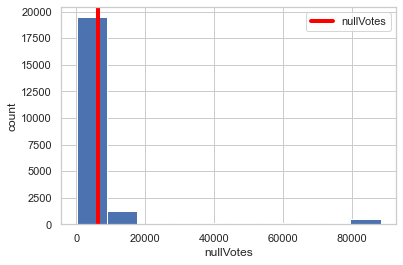

In [108]:
#checking the mean of nullVotes

red_shift = ds['nullVotes'].hist()
mean_val = np.mean(ds['nullVotes'])
plt.axvline(mean_val,linewidth=4, color='red', label='nullVotes')
plt.xlabel('nullVotes')
plt.ylabel('count')
plt.legend()
plt.show()

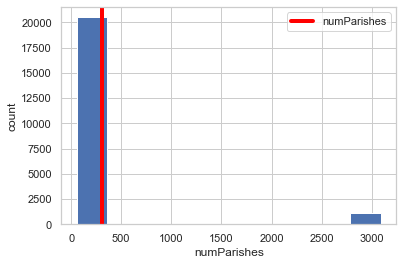

In [110]:
#checking the mean of numParishes

red_shift = ds['numParishes'].hist()
mean_val = np.mean(ds['numParishes'])
plt.axvline(mean_val,linewidth=4, color='red', label='numParishes')
plt.xlabel('numParishes')
plt.ylabel('count')
plt.legend()
plt.show()

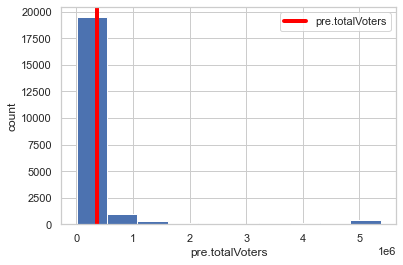

In [112]:
#checking the mean of pre.totalVoters

red_shift = ds['pre.totalVoters'].hist()
mean_val = np.mean(ds['pre.totalVoters'])
plt.axvline(mean_val,linewidth=4, color='red', label='pre.totalVoters')
plt.xlabel('pre.totalVoters')
plt.ylabel('count')
plt.legend()
plt.show()

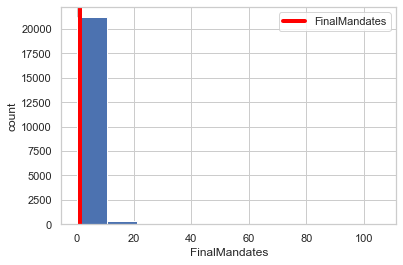

In [117]:
#checking the mean of FinalMandates

red_shift = ds['FinalMandates'].hist()
mean_val = np.mean(ds['FinalMandates'])
plt.axvline(mean_val,linewidth=4, color='red', label='FinalMandates')
plt.xlabel('FinalMandates')
plt.ylabel('count')
plt.legend()
plt.show()

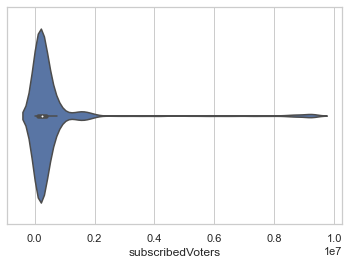

122987    680
151535    665
240917    640
258144    620
136696    608
         ... 
164977     16
188112     16
186681     16
161553     16
216808     16
Name: subscribedVoters, Length: 335, dtype: int64

In [120]:
#Checking the column subscribedVoters


sns.set(style='whitegrid')
sns.violinplot(ds['subscribedVoters'])
plt.show()

ds['subscribedVoters'].value_counts()

## Bivariate Analysis

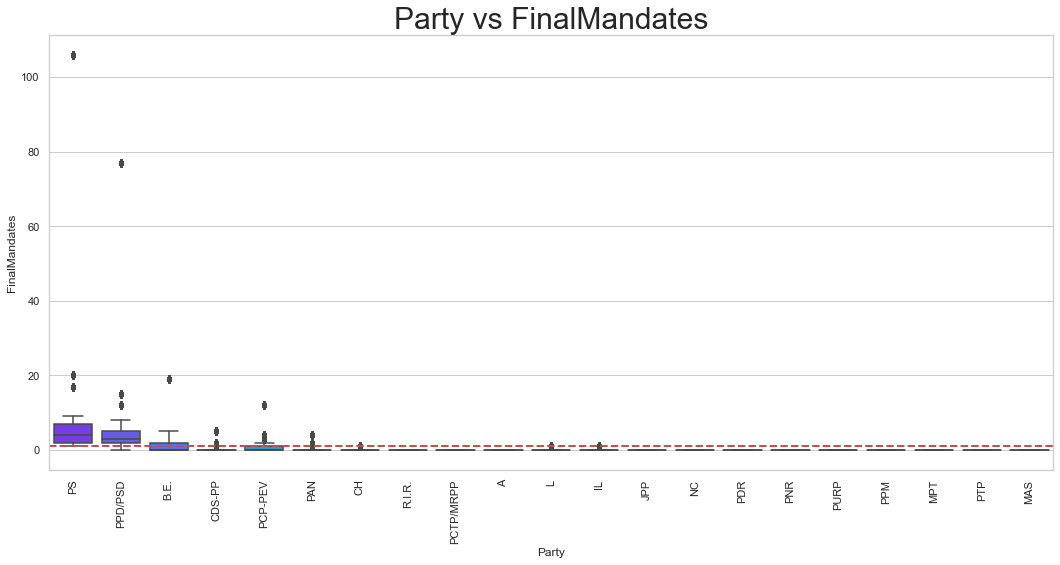

In [125]:
#Party vs FinalMandates

plt.figure(figsize=(18,8))
mean_price=np.mean(ds['FinalMandates'])
sns.boxplot(y='FinalMandates',x='Party',data=ds,palette="rainbow")
plt.axhline(mean_price,color='r',linestyle='dashed',linewidth=2)
plt.title("Party vs FinalMandates",fontsize=30)
plt.xticks(rotation='vertical')
plt.show()

Observation:
    
    Maximum number of FinalMandates are from the PS party

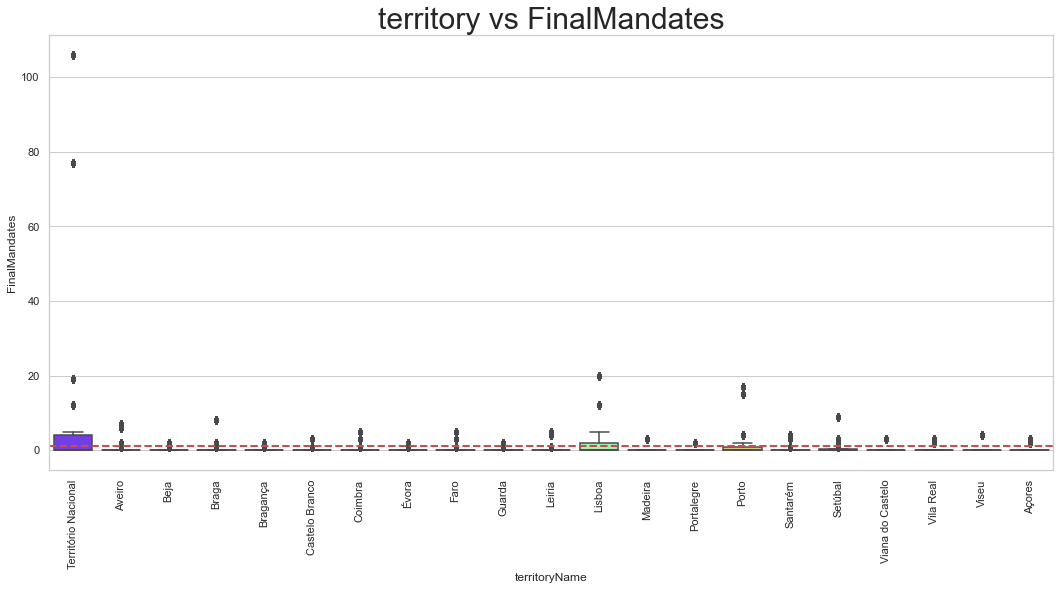

In [127]:
#territoryName vs FinalMandates

plt.figure(figsize=(18,8))
mean_price=np.mean(ds['FinalMandates'])
sns.boxplot(y='FinalMandates',x='territoryName',data=ds,palette="rainbow")
plt.axhline(mean_price,color='r',linestyle='dashed',linewidth=2)
plt.title("territory vs FinalMandates",fontsize=30)
plt.xticks(rotation='vertical')
plt.show()

Observation:
    
    Maximum number of FinalMandates are from Territoria Nacional

<Figure size 1296x576 with 0 Axes>

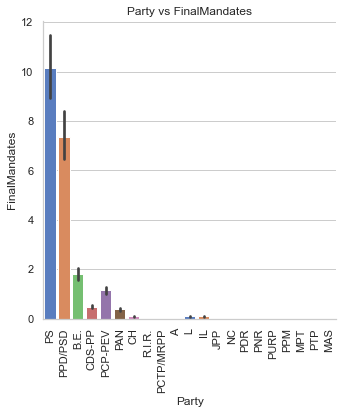

In [130]:
#Factor plot of Party vs FinalMandates
plt.figure(figsize=(18,8))
sns.factorplot(x='Party',y='FinalMandates',data=ds,kind='bar',size=5,palette='muted',aspect=1)
plt.title('Party vs FinalMandates')
plt.xticks(rotation='vertical')
plt.ylabel('FinalMandates')
plt.show()

<Figure size 576x288 with 0 Axes>

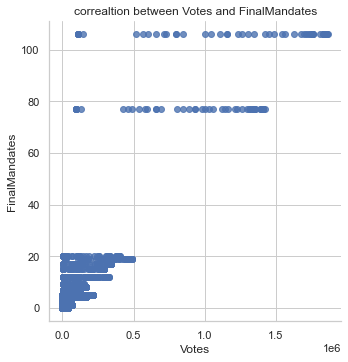

In [131]:
#scatter plot between FinalMandates and Votes
plt.figure(figsize=(8,4))
sns.lmplot(x='Votes',y='FinalMandates',fit_reg=False,data=ds)
plt.xlabel('Votes')
plt.title('correaltion between Votes and FinalMandates')
plt.ylabel('FinalMandates')
plt.show()

observation:
    
    As the no. of votes increases FinalMandates increases.

<Figure size 576x288 with 0 Axes>

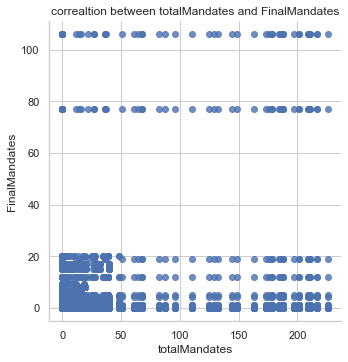

In [133]:
#scatter plot between FinalMandates and totalMandates
plt.figure(figsize=(8,4))
sns.lmplot(x='totalMandates',y='FinalMandates',fit_reg=False,data=ds)
plt.xlabel('totalMandates')
plt.title('correaltion between totalMandates and FinalMandates')
plt.ylabel('FinalMandates')
plt.show()

<Figure size 576x288 with 0 Axes>

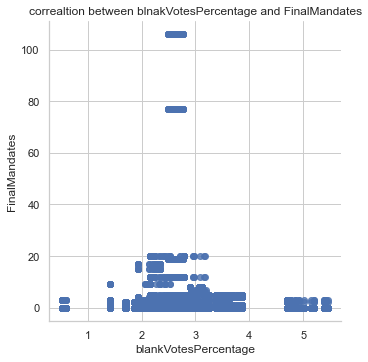

In [135]:
#scatter plot between FinalMandates and blankVotesPercentage
plt.figure(figsize=(8,4))
sns.lmplot(x='blankVotesPercentage',y='FinalMandates',fit_reg=False,data=ds)
plt.xlabel('blankVotesPercentage')
plt.title('correaltion between blnakVotesPercentage and FinalMandates')
plt.ylabel('FinalMandates')
plt.show()

<Figure size 576x288 with 0 Axes>

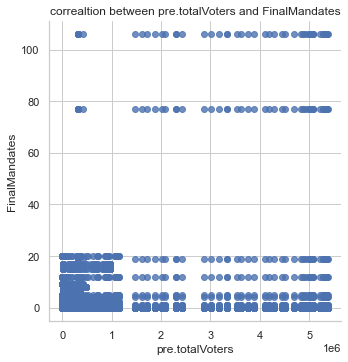

In [137]:
#scatter plot between FinalMandates and pre.totalVoters
plt.figure(figsize=(8,4))
sns.lmplot(x='pre.totalVoters',y='FinalMandates',fit_reg=False,data=ds)
plt.xlabel('pre.totalVoters')
plt.title('correaltion between pre.totalVoters and FinalMandates')
plt.ylabel('FinalMandates')
plt.show()

<Figure size 576x288 with 0 Axes>

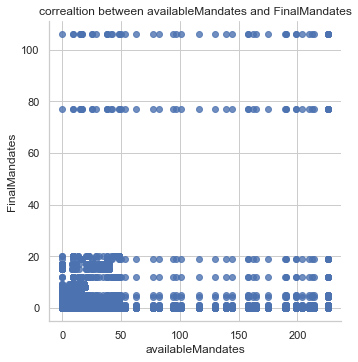

In [139]:
#scatter plot between FinalMandates and availableMandates
plt.figure(figsize=(8,4))
sns.lmplot(x='availableMandates',y='FinalMandates',fit_reg=False,data=ds)
plt.xlabel('availableMandates')
plt.title('correaltion between availableMandates and FinalMandates')
plt.ylabel('FinalMandates')
plt.show()

<Figure size 576x288 with 0 Axes>

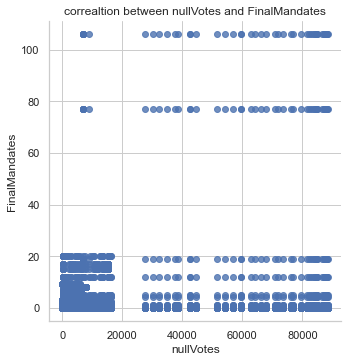

In [141]:
#scatter plot between FinalMandates and nullVotes
plt.figure(figsize=(8,4))
sns.lmplot(x='nullVotes',y='FinalMandates',fit_reg=False,data=ds)
plt.xlabel('nullVotes')
plt.title('correaltion between nullVotes and FinalMandates')
plt.ylabel('FinalMandates')
plt.show()

<Figure size 576x288 with 0 Axes>

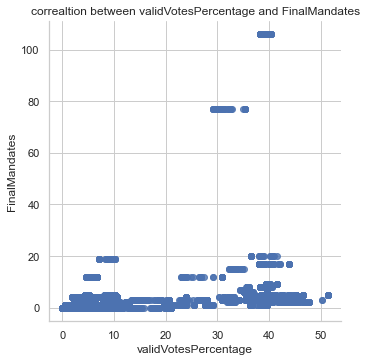

In [143]:
#scatter plot between FinalMandates and validVotesPercentage
plt.figure(figsize=(8,4))
sns.lmplot(x='validVotesPercentage',y='FinalMandates',fit_reg=False,data=ds)
plt.xlabel('validVotesPercentage')
plt.title('correaltion between validVotesPercentage and FinalMandates')
plt.ylabel('FinalMandates')
plt.show()

## Multivariate Analysis

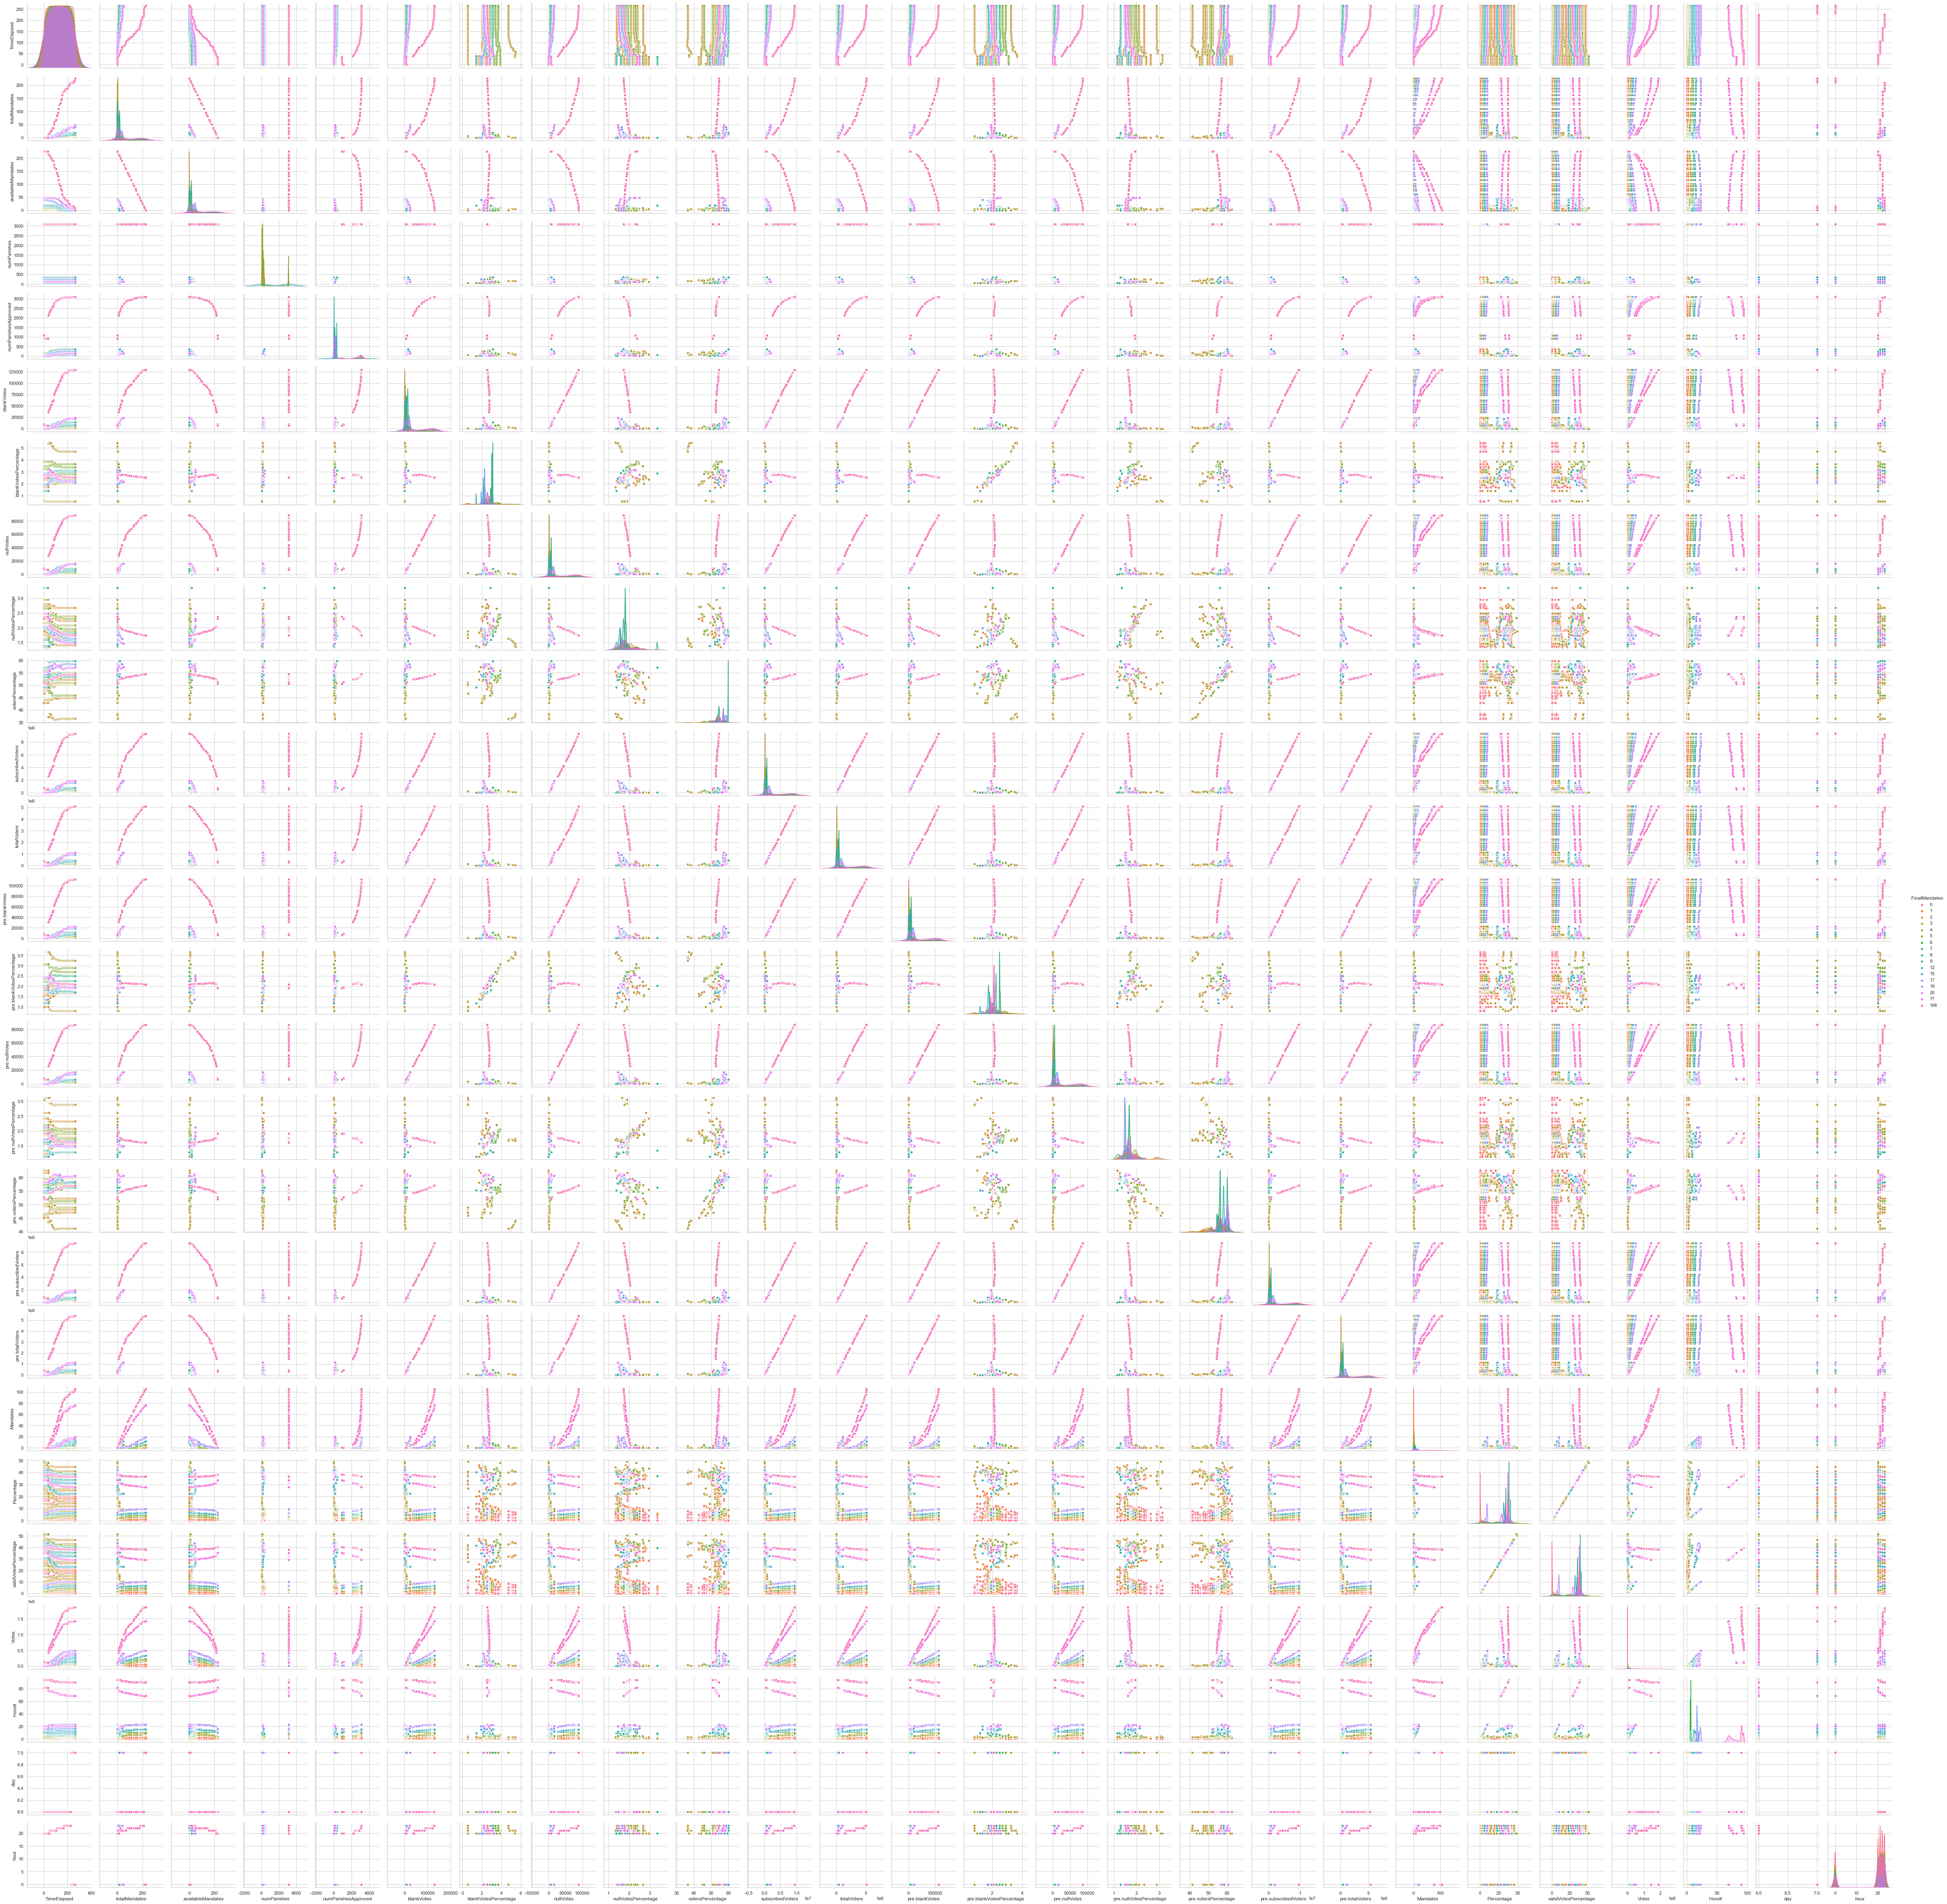

In [144]:
sns.pairplot(ds, hue='FinalMandates')

## Encoding Categorical Columns

In [147]:
ds.dtypes

TimeElapsed                          int64
time                        datetime64[ns]
territoryName                       object
totalMandates                        int64
availableMandates                    int64
numParishes                          int64
numParishesApproved                  int64
blankVotes                           int64
blankVotesPercentage               float64
nullVotes                            int64
nullVotesPercentage                float64
votersPercentage                   float64
subscribedVoters                     int64
totalVoters                          int64
pre.blankVotes                       int64
pre.blankVotesPercentage           float64
pre.nullVotes                        int64
pre.nullVotesPercentage            float64
pre.votersPercentage               float64
pre.subscribedVoters                 int64
pre.totalVoters                      int64
Party                               object
Mandates                             int64
Percentage 

In [148]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

list1=['territoryName','Party']
for val in list1:
    ds[val]=le.fit_transform(ds[val].astype(str))

In [149]:
ds.head()

TimeElapsed                time  territoryName  totalMandates  \
0            0 2019-10-06 20:10:02             16              0   
1            0 2019-10-06 20:10:02             16              0   
2            0 2019-10-06 20:10:02             16              0   
3            0 2019-10-06 20:10:02             16              0   
4            0 2019-10-06 20:10:02             16              0   

   availableMandates  numParishes  numParishesApproved  blankVotes  \
0                226         3092                 1081        9652   
1                226         3092                 1081        9652   
2                226         3092                 1081        9652   
3                226         3092                 1081        9652   
4                226         3092                 1081        9652   

   blankVotesPercentage  nullVotes  ...  pre.totalVoters  Party  Mandates  \
0                   2.5       8874  ...           428546     17         0   
1                   2.5       8874  ...           428546     15         0   
2                   2.5       8874  ...           428546      1         0   
3                   2.5       8874  ...           428546      2         0   
4                   2.5       8874  ...           428546     11         0   

   Percentage  validVotesPercentage   Votes  Hondt  FinalMandates  day  hour  
0       38.29                 40.22  147993     94            106    6    20  
1       33.28                 34.95  128624     81             77    6    20  
2        6.81                  7.15   26307     16             19    6    20  
3        4.90                  5.14   18923     12              5    6    20  
4        4.59                  4.83   17757     11             12    6    20  

[5 rows x 30 columns]

## dropping unnecessary columns

In [150]:
ds.drop(['time','day','hour'],axis=1,inplace=True)

In [151]:
ds.head()

TimeElapsed  territoryName  totalMandates  availableMandates  numParishes  \
0            0             16              0                226         3092   
1            0             16              0                226         3092   
2            0             16              0                226         3092   
3            0             16              0                226         3092   
4            0             16              0                226         3092   

   numParishesApproved  blankVotes  blankVotesPercentage  nullVotes  \
0                 1081        9652                   2.5       8874   
1                 1081        9652                   2.5       8874   
2                 1081        9652                   2.5       8874   
3                 1081        9652                   2.5       8874   
4                 1081        9652                   2.5       8874   

   nullVotesPercentage  ...  pre.votersPercentage  pre.subscribedVoters  \
0                  2.3  ...                 52.66                813743   
1                  2.3  ...                 52.66                813743   
2                  2.3  ...                 52.66                813743   
3                  2.3  ...                 52.66                813743   
4                  2.3  ...                 52.66                813743   

   pre.totalVoters  Party  Mandates  Percentage  validVotesPercentage   Votes  \
0           428546     17         0       38.29                 40.22  147993   
1           428546     15         0       33.28                 34.95  128624   
2           428546      1         0        6.81                  7.15   26307   
3           428546      2         0        4.90                  5.14   18923   
4           428546     11         0        4.59                  4.83   17757   

   Hondt  FinalMandates  
0     94            106  
1     81             77  
2     16             19  
3     12              5  
4     11             12  

[5 rows x 27 columns]

## Removing Outliers

In [152]:
from scipy.stats import zscore
z_score=abs(zscore(ds))
print(ds.shape)
ds_final=ds.loc[(z_score<3).all(axis=1)]
print(ds_final.shape)

(21643, 27)
(18333, 27)


In [153]:
ds=ds_final
print(ds.shape)

(18333, 27)


## Removing skewness

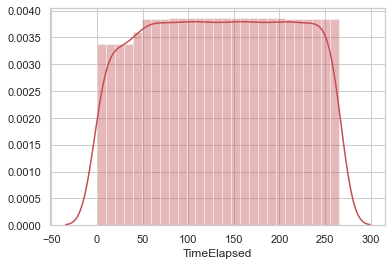

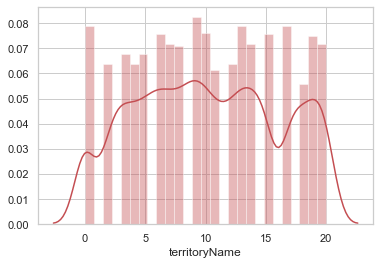

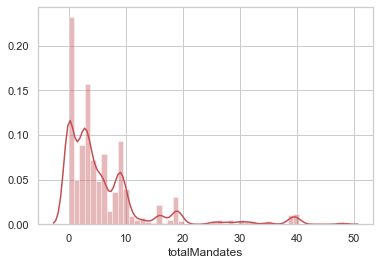

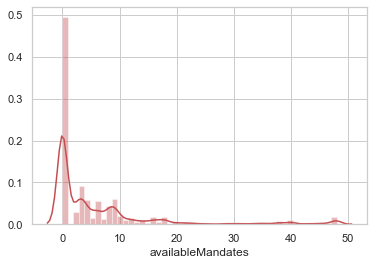

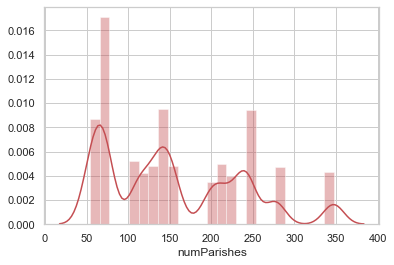

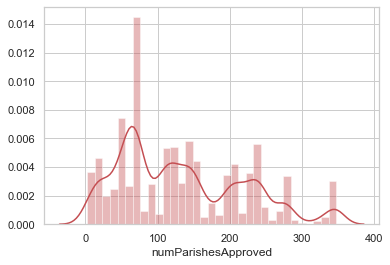

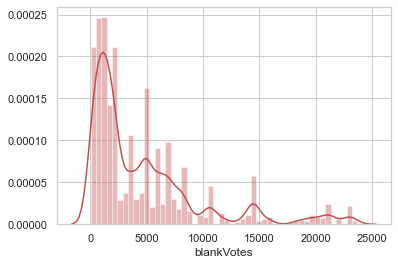

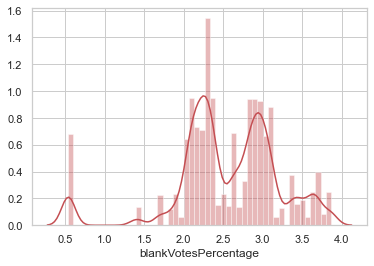

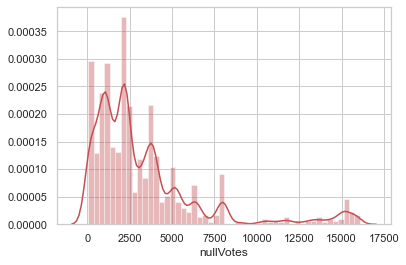

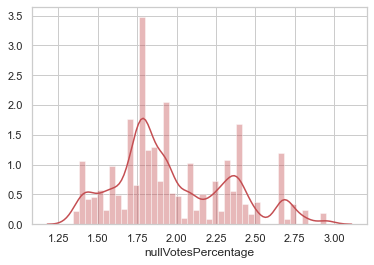

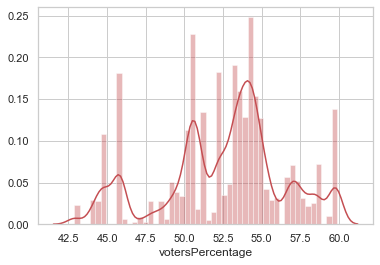

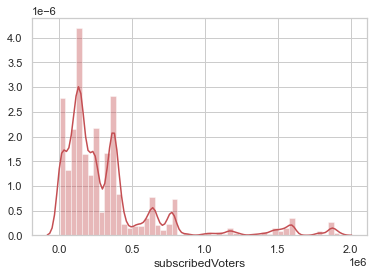

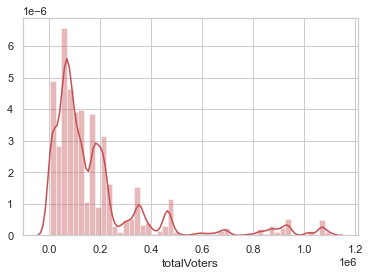

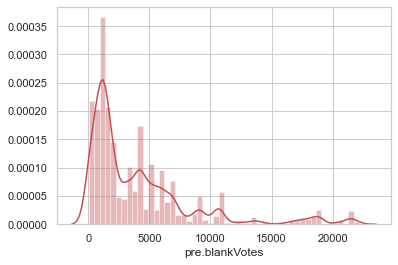

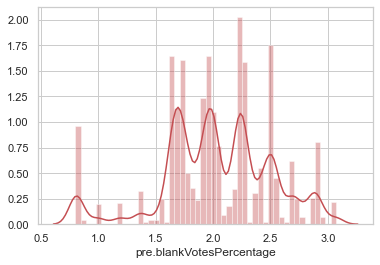

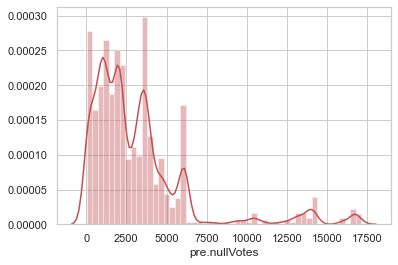

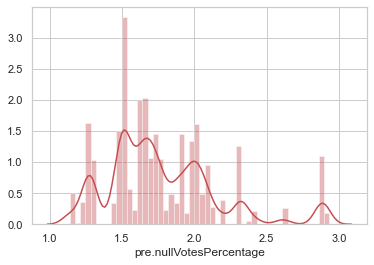

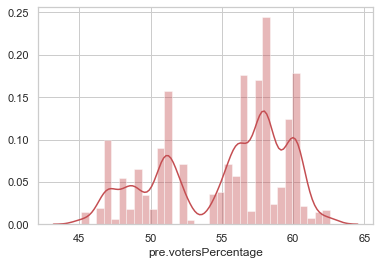

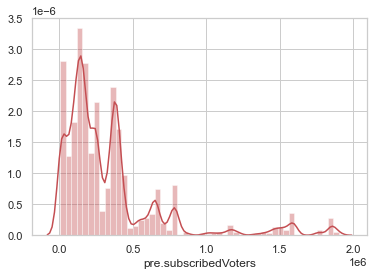

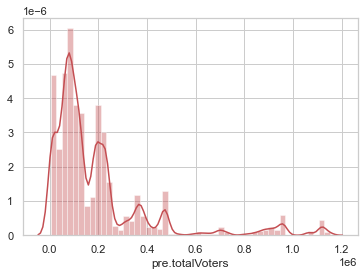

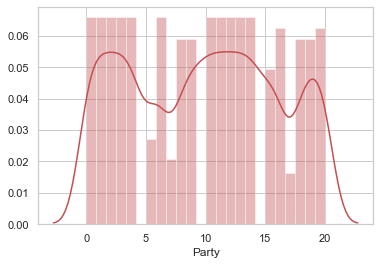

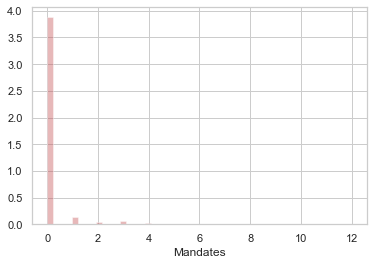

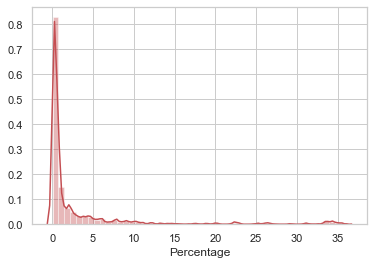

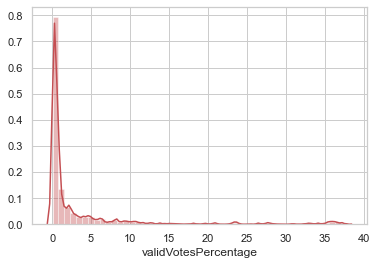

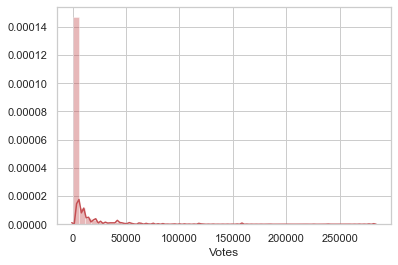

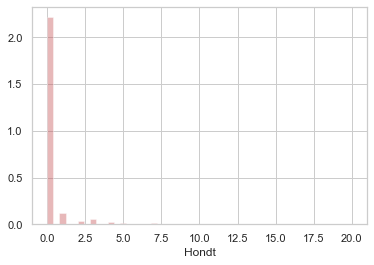

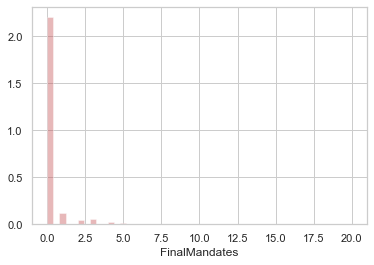

In [154]:
for col in ds.describe().columns:
    sns.distplot(ds[col],color='r')
    plt.show()

In [155]:
ds.skew()

TimeElapsed                -0.024110
territoryName               0.034073
totalMandates               2.542453
availableMandates           2.593527
numParishes                 0.585363
numParishesApproved         0.619329
blankVotes                  1.800122
blankVotesPercentage       -0.844508
nullVotes                   2.103352
nullVotesPercentage         0.564426
votersPercentage           -0.392023
subscribedVoters            2.407541
totalVoters                 2.468630
pre.blankVotes              2.034860
pre.blankVotesPercentage   -0.410446
pre.nullVotes               2.340000
pre.nullVotesPercentage     1.033803
pre.votersPercentage       -0.514215
pre.subscribedVoters        2.370988
pre.totalVoters             2.468950
Party                       0.009657
Mandates                    7.177093
Percentage                  3.373567
validVotesPercentage        3.383145
Votes                       7.310058
Hondt                       7.012845
FinalMandates               6.746120
d

In [156]:
#Removing skewness via log method

for col in ds.columns:
    if ds.skew().loc[col]>0.55:
        ds[col]=np.log1p(ds[col])

In [157]:
ds.skew()

TimeElapsed                -0.024110
territoryName               0.034073
totalMandates               0.020702
availableMandates           0.503375
numParishes                -0.138265
numParishesApproved        -1.099103
blankVotes                 -0.592756
blankVotesPercentage       -0.844508
nullVotes                  -0.880145
nullVotesPercentage         0.329675
votersPercentage           -0.392023
subscribedVoters           -0.772107
totalVoters                -0.647681
pre.blankVotes             -0.642916
pre.blankVotesPercentage   -0.410446
pre.nullVotes              -0.937998
pre.nullVotesPercentage     0.628444
pre.votersPercentage       -0.514215
pre.subscribedVoters       -0.802802
pre.totalVoters            -0.670218
Party                       0.009657
Mandates                    4.479200
Percentage                  1.565493
validVotesPercentage        1.550088
Votes                       0.268973
Hondt                       3.488567
FinalMandates               3.368168
d

In [158]:
ds.isnull().sum()

TimeElapsed                 0
territoryName               0
totalMandates               0
availableMandates           0
numParishes                 0
numParishesApproved         0
blankVotes                  0
blankVotesPercentage        0
nullVotes                   0
nullVotesPercentage         0
votersPercentage            0
subscribedVoters            0
totalVoters                 0
pre.blankVotes              0
pre.blankVotesPercentage    0
pre.nullVotes               0
pre.nullVotesPercentage     0
pre.votersPercentage        0
pre.subscribedVoters        0
pre.totalVoters             0
Party                       0
Mandates                    0
Percentage                  0
validVotesPercentage        0
Votes                       0
Hondt                       0
FinalMandates               0
dtype: int64

# Model Training

In [160]:
x=ds.drop(columns=['FinalMandates'],axis=1)

In [161]:
y=ds['FinalMandates']

In [162]:
#checking the shape of input and target variable
print(x.shape,'\t\t',y.shape)

(18333, 26) 		 (18333,)


In [163]:
#scaling input variables

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

## We have observed multicollinearity in columns so we will apply PCA

In [164]:
from sklearn.decomposition import PCA
pca=PCA(n_components=10)
xpca=pca.fit_transform(x)
x=xpca

In [165]:
pd.DataFrame(data=x)

0         1         2         3         4         5         6  \
0      6.264872  6.540071  0.331743 -1.826393  0.185770  1.384952  0.032226   
1      6.737703  3.585886 -0.577171 -1.586907 -0.409614 -0.845632 -1.202815   
2      6.773014  3.366166 -0.669949 -1.589473 -0.358857 -0.666587 -1.119722   
3      7.040982  1.662878 -1.269262 -1.504399 -0.269687  0.381539 -0.627255   
4      7.065709  1.533772 -1.318858 -1.503747 -0.273863  0.291743 -0.678852   
...         ...       ...       ...       ...       ...       ...       ...   
18328 -1.942217 -2.107866  1.239097  0.300725 -0.537917 -0.544292  1.496318   
18329 -1.936715 -2.167152  1.199438  0.291306 -0.424570  0.088897  1.821105   
18330 -1.911869 -2.185540  1.210552  0.297427 -0.552009 -0.640071  1.445935   
18331 -1.898123 -2.301061  1.132494  0.277650 -0.326410  0.627146  2.096557   
18332 -1.826524 -2.354490  1.151086  0.286337 -0.603955 -0.941144  1.291167   

              7         8         9  
0      0.484358  1.502631 -1.295804  
1      0.655347  1.681355 -0.024853  
2      0.650344  1.692630  0.044887  
3      0.495699  1.582775 -0.517162  
4      0.517313  1.610528 -0.348614  
...         ...       ...       ...  
18328  0.373487 -0.767055  0.751588  
18329  0.301648 -0.826583  0.393421  
18330  0.397590 -0.744353  0.890747  
18331  0.254881 -0.863591  0.173626  
18332  0.468671 -0.683150  1.266579  

[18333 rows x 10 columns]

In [166]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
max_r_score=0
for r_state in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to",final_r_state,"is",max_r_score)

max r2 score corresponding to 87 is 0.903979848500857


In [167]:
#splitting the data into training and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=87)

In [168]:
#Importing all model library
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

#Importing Boosting models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

#importing error metrics
from sklearn.model_selection import GridSearchCV,cross_val_score

In [169]:
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]
for m in model:
    m.fit(x_train,y_train)
    print('score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error:')
    print('Mean absolute error:',mean_absolute_error(y_test,predm))
    print('Mean squared error:',mean_squared_error(y_test,predm))
    print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predm)))
    print("r2_score:",r2_score(y_test,predm))
    print('********************************************************************************************')
    print('\n')

score of LinearRegression() is: 0.888502742899032
Error:
Mean absolute error: 0.08916738504174698
Mean squared error: 0.020527992273938433
Root Mean Squared Error: 0.14327593054640558
r2_score: 0.9036629976305963
********************************************************************************************


score of DecisionTreeRegressor() is: 1.0
Error:
Mean absolute error: 0.002653839193979708
Mean squared error: 0.0017649250631440513
Root Mean Squared Error: 0.04201101121306236
r2_score: 0.9917172810803427
********************************************************************************************


score of KNeighborsRegressor() is: 0.9976845227327542
Error:
Mean absolute error: 0.0034868720627921033
Mean squared error: 0.0012521088540989734
Root Mean Squared Error: 0.03538515019183858
r2_score: 0.9941239059312573
********************************************************************************************


score of SVR() is: 0.974829373199441
Error:
Mean absolute error: 0.050087083

In [170]:
#Cross validating all algorithms by using for loop

model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]

for m in model:
    score=cross_val_score(m,x,y,cv=10,scoring='r2')
    print("Model:",m)
    print("Score:",score)
    print("Mean score:",score.mean())
    print("Standard deviation:",score.std())
    print('****************************************************************************************************************************************************')
    print('\n')

Model: LinearRegression()
Score: [0.71458152 0.75648373 0.83098981 0.88961991 0.92165465 0.95243166
 0.95279265 0.95004191 0.94548481 0.94407807]
Mean score: 0.8858158721642713
Standard deviation: 0.0838785987543626
****************************************************************************************************************************************************


Model: DecisionTreeRegressor()
Score: [0.94365019 0.93339349 0.94901545 0.97699493 0.99251793 0.99341049
 0.99985028 0.99779822 0.99949828 0.96339228]
Mean score: 0.9749521535128807
Standard deviation: 0.024312732643305104
****************************************************************************************************************************************************


Model: KNeighborsRegressor()
Score: [0.94723146 0.9756225  0.98414718 0.99431504 0.99616059 0.99977362
 0.99991216 1.         1.         0.99994518]
Mean score: 0.9897107737784581
Standard deviation: 0.016181881380479535
**************************************

## KNN is giving best score, r2 score, cross validation score with least errors so we choose it as our final model

In [172]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={"n_neighbors":range(1,30)}
knr=KNeighborsRegressor()
gknr = GridSearchCV(knr, neighbors, cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 1}

In [173]:
#using KNR with its best parameters

kn=KNeighborsRegressor(n_neighbors=1)
kn.fit(x_train,y_train)
print('Score:',kn.score(x_train,y_train))
y_pred=kn.predict(x_test)
print('\n')
print('Mean absolute error:',mean_absolute_error(y_test,y_pred))
print('Mean squared error:',mean_squared_error(y_test,y_pred))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print("r2_score:",r2_score(y_test,y_pred))
print('\n')

Score: 1.0


Mean absolute error: 0.00019974768884874723
Mean squared error: 0.00011724635778388488
Root Mean Squared error: 0.010828035730633921


r2_score: 0.9994497677855243




In [174]:
#Cross validating

score=cross_val_score(kn,x,y,cv=10,scoring='r2')
print("Score:",score)
print('Mean Score:',score.mean())
print("Standard deviation:",score.std())

Score: [1.         0.98754581 1.         0.99892067 0.99939316 0.99985
 1.         1.         1.         1.        ]
Mean Score: 0.9985709639193404
Standard deviation: 0.003691085084537273


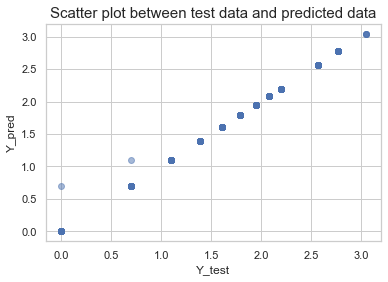

In [176]:
#Scatter plot between test data and prediction

plt.scatter(y_test,y_pred, alpha=0.5)
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.title("Scatter plot between test data and predicted data",fontsize=15)
plt.show()

In [177]:
#saving our model

import joblib
joblib.dump(kn,'kn_Election.csv')

['kn_Election.csv']

In [178]:
model=joblib.load('kn_Election.csv')

In [179]:
#Testing our model
import sys
nums= model.predict(x_test)
np.set_printoptions(threshold=sys.maxsize)
print(nums)

[0.69314718 1.09861229 0.         0.         0.         0.
 0.         0.         1.09861229 0.         1.60943791 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         1.09861229 0.         0.         0.         0.69314718
 0.         0.         0.         0.         0.         0.69314718
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         2.77258872
 0.69314718 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         1.38629436 0.         0.         0.
 0.         0.69314718 1.38629436 0.         1.38629436 2.19722458
 0.         0.         0